In [42]:
import networkx as nx
import numpy as np
import pandas as pd
from ge import DeepWalk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
G = pd.read_csv('./seealsology-data.tsv',sep='\t')
G.rename(columns={'depth':'weight'},inplace = True)

In [32]:
G.head()

source                          target  weight
0  life insurance  corporate-owned life insurance       1
1  life insurance      critical illness insurance       1
2  life insurance                economic capital       1
3  life insurance                 estate planning       1
4  life insurance          false insurance claims       1

In [28]:
G1 = nx.from_pandas_edgelist(G, 'source', 'target', edge_attr='weight')

In [34]:
model = DeepWalk(G1, walk_length=10, num_walks=80, workers=1)
model.train(window_size=5, iter=20)
embeddings = model.get_embeddings()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished


Learning embedding vectors...
Learning embedding vectors done!


c:\users\lx\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


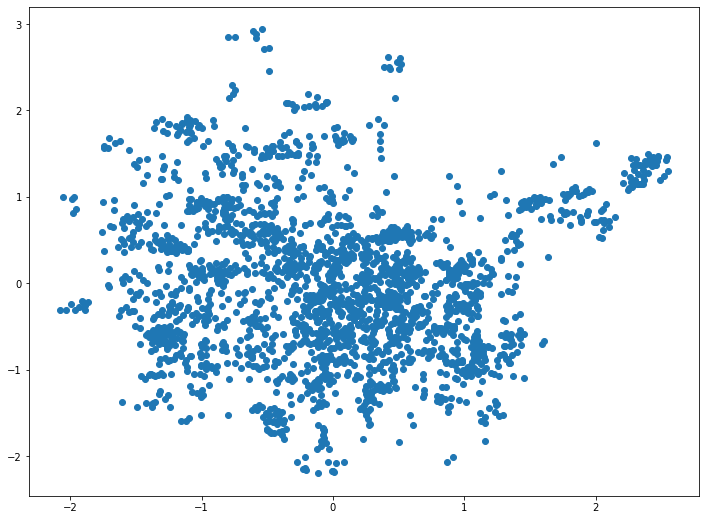

In [44]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
	# 每个节点的embedding为100维
    X = model.w2v_model[word_list]
    #print(type(X))
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
#    for i, word in enumerate(word_list):
#        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
# 将所有的球队embedding进行绘制
plot_nodes(model.w2v_model.wv.vocab)


In [45]:
print(model.w2v_model.similar_by_word('critical illness insurance'))

c:\users\lx\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('total permanent disability insurance', 0.9235997796058655), ('return of premium life insurance', 0.6517488956451416), ('tontine', 0.6476163864135742), ("servicemembers' group life insurance", 0.6086084842681885), ('permanent life insurance', 0.6036256551742554), ('pet insurance', 0.595052182674408), ('corporate-owned life insurance', 0.5901477336883545), ('life insurance', 0.5778565406799316), ('medicaid estate recovery', 0.5736897587776184), ('internal revenue code section 79', 0.5651351809501648)]
